# Projeto de análise de dados - Dataset de vendas

### Fonte: Sample - Superstore Sales 
(Disponível em: https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls. Acesso em 11 julho 2023) 

***
## Preparo dos dados
***

In [1]:
#Importação da biblioteca
import pandas as pd

In [2]:
#Leitura de dados e armazenamento em DataFrame

vendas = pd.read_csv('dataset.csv')
vendas.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [3]:
#Informações do Dataframe 'vendas'
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9700 entries, 0 to 9699
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_Pedido     9700 non-null   object 
 1   Data_Pedido   9700 non-null   object 
 2   ID_Cliente    9700 non-null   object 
 3   Segmento      9700 non-null   object 
 4   Pais          9700 non-null   object 
 5   Cidade        9700 non-null   object 
 6   Estado        9700 non-null   object 
 7   ID_Produto    9700 non-null   object 
 8   Categoria     9700 non-null   object 
 9   SubCategoria  9700 non-null   object 
 10  Valor_Venda   9700 non-null   float64
dtypes: float64(1), object(10)
memory usage: 833.7+ KB


In [4]:
#Verificação de valores nulos
vendas.isna().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

Dataset sem valores ausentes

In [5]:
#Alteração do formato das datas

#Importação da biblioteca 
from datetime import datetime as dt

#Alteração do formato das datas 
vendas['Data_Pedido'] = pd.to_datetime(vendas['Data_Pedido'], dayfirst=True)

#Manutenção do index original (evita a ordenação por data alterada)
vendas.sort_index(ascending=True, inplace=True)

vendas.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


Formato de datas alterado, mantendo os índices originais 

_Observação: a alteração no formato das datas auxiliará em análises temporais._

***
## Extração de informações
***

## Pergunta de Negócio 1:
Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [6]:
#Dataframe somente com vendas da Categoria 'Office Supplies', agrupado por cidade e soma do valor de venda
df1 = vendas[vendas.Categoria=='Office Supplies'][['Cidade','Valor_Venda']].groupby(['Cidade']).sum()

# Organização da coluna de 'Valor_Venda' em ordem decrescente 
df1.sort_values(by='Valor_Venda', ascending=False, inplace=True)
df1.head()

,Valor_Venda
Cidade,
New York City,68362.814
Los Angeles,47098.100
San Francisco,41771.198
Seattle,34856.878
Philadelphia,29313.687


### New York City possui o maior valor de venda da Categoria 'Office Supplies' (Aproximadamente $ 68,363.00) 

***
## Pergunta de Negócio 2:
Qual o Total de Vendas Por Data do Pedido?
Demonstre o resultado através de um gráfico de barras.


In [7]:
#Series com total de vendas por data
df2 = vendas.groupby('Data_Pedido')['Valor_Venda'].sum()
df2.head()

Data_Pedido
2015-01-03      16.448
2015-01-04     288.060
2015-01-05      19.536
2015-01-06    4407.100
2015-01-07      87.158
Name: Valor_Venda, dtype: float64

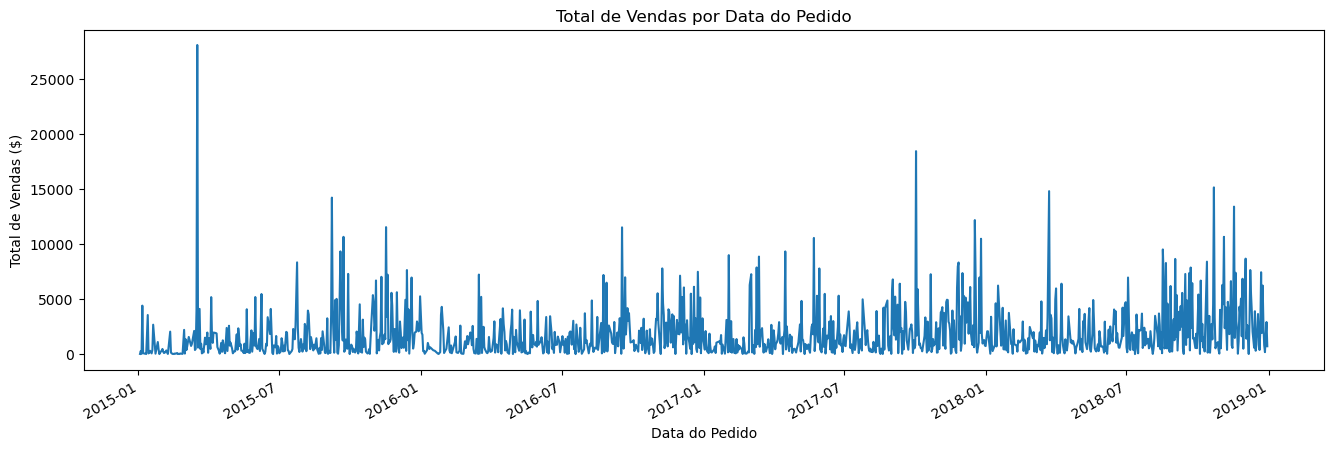

In [8]:
#Plotagem de Gráfico

#Importação da biblioteca
import matplotlib.pyplot as plt 

#Características do gráfico 
plt.figure(figsize = (16, 5))
df2.plot(x = 'Data_Pedido', y = 'Valor_Venda',title= 'Total de Vendas por Data do Pedido',\
         xlabel='Data do Pedido', ylabel = 'Total de Vendas ($)')

#Plotagem 
plt.show()

***
### Pergunta de Negócio 3:
Qual o Total de Vendas por Estado?
Demonstre o resultado através de um gráfico de barras.

In [9]:
#Series com total de vendas por estado
df3 = vendas.groupby('Estado')['Valor_Venda'].sum()
df3.head()

Estado
Alabama        19510.6400
Arizona        35272.6570
Arkansas       11673.8300
California    442927.0975
Colorado       31841.5980
Name: Valor_Venda, dtype: float64

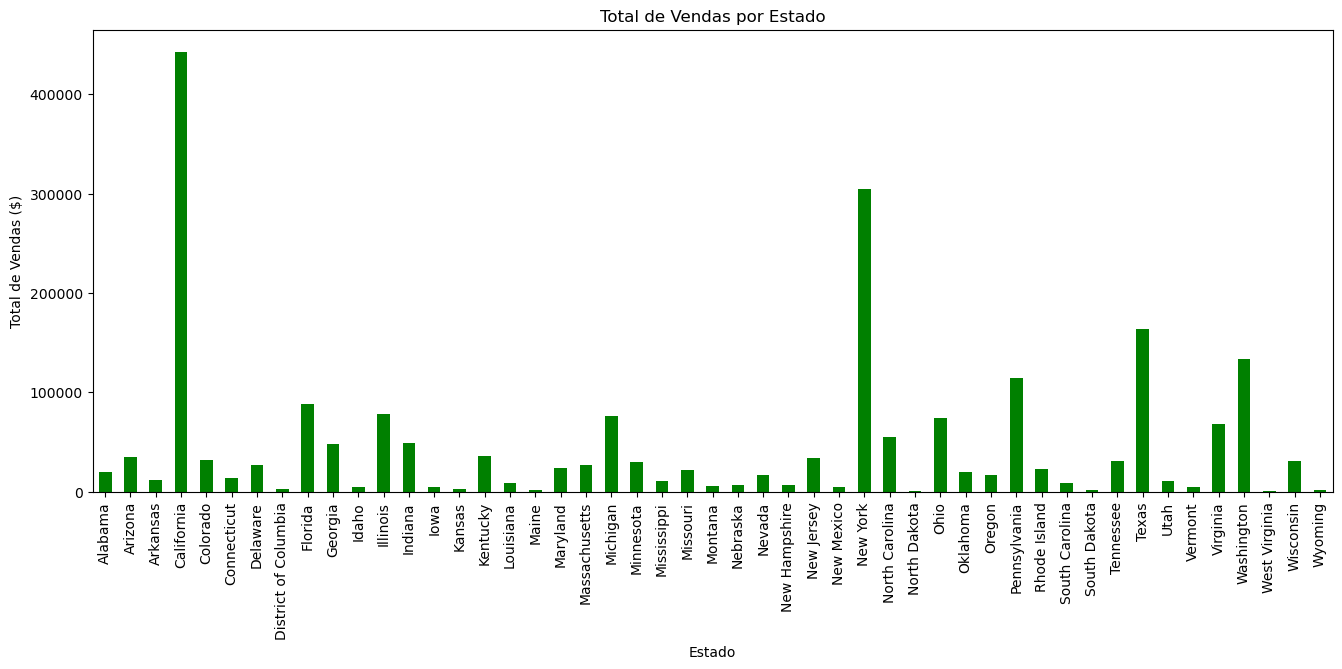

In [10]:
#Características do gráfico 
plt.figure(figsize = (16, 6))
df3.plot(kind='bar', x = 'Estado', y = 'Valor_Venda',title= 'Total de Vendas por Estado',\
         xlabel='Estado', ylabel = 'Total de Vendas ($)', color='green')

#Plotagem 
plt.show()

***
### Pergunta de Negócio 4:
Quais São as 10 Cidades com Maior Total de Vendas?
Demonstre o resultado através de um gráfico de barras.

In [11]:
#Criação de DataFrame com total de vendas por cidade em ordem decrescente
df4 = pd.DataFrame(vendas.groupby('Cidade')['Valor_Venda'].sum())
df4.sort_values(by='Valor_Venda', ascending=False, inplace=True)

#Fatiamento das 10 primeiras cidades 
df4=df4[:10]

#Edição do DataFrame para exibição dos índices
df4.reset_index(inplace=True)
df4

,Cidade,Valor_Venda
0,New York City,251749.2190
1,Los Angeles,171654.6330
2,Seattle,114725.4780
3,San Francisco,107489.9520
4,Philadelphia,107197.8030
5,Houston,61590.1868
6,San Diego,47458.3790
7,Chicago,46974.3430
8,Jacksonville,44713.1830
9,Detroit,42446.9440


<Figure size 1400x600 with 0 Axes>

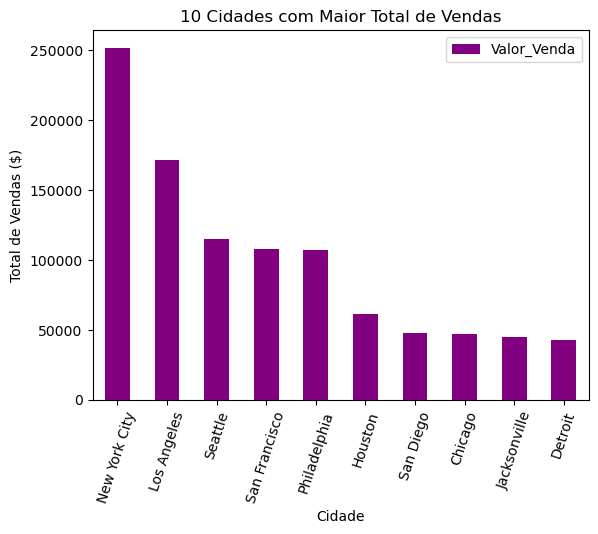

In [12]:
#Características do gráfico 
plt.figure(figsize = (14, 6))
df4.plot(kind='bar', x = 'Cidade', y = 'Valor_Venda',title= '10 Cidades com Maior Total de Vendas',\
         xlabel='Cidade', ylabel = 'Total de Vendas ($)', color='purple')
plt.xticks(rotation=72)

#Plotagem 
plt.show()

***
### Pergunta de Negócio 5:
Qual Segmento Teve o Maior Total de Vendas?
Demonstre o resultado através de um gráfico de pizza.

In [13]:
#Series com total de vendas por segmento 
df5 = vendas.groupby('Segmento')['Valor_Venda'].sum()
df5.head()

Segmento
Consumer       1.133834e+06
Corporate      6.792322e+05
Home Office    4.224914e+05
Name: Valor_Venda, dtype: float64

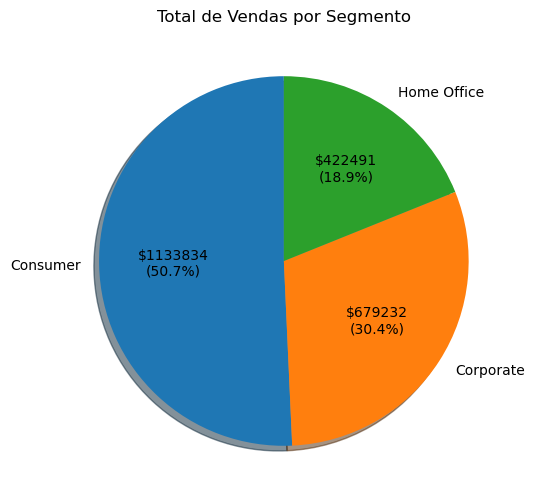

In [14]:
#Características do gráfico
plt.figure(figsize=(16, 6))
df5.plot(kind='pie',ylabel=' ',xlabel= ' ', \
              # Edita a legenda incluindo porcentagem e valor absoluto de vendas
              autopct=lambda x: f'${x * sum(df5) / 100:.0f}\n({x:.1f}%)', \
              #Acrescenta sombra, ângulo e título
              shadow=True, startangle=90, title='Total de Vendas por Segmento')

#Plotagem
plt.show()

***
### Pergunta de Negócio 6:
Qual o Total de Vendas Por Segmento e Por Ano?

In [15]:
#Criação da coluna 'Ano' pelo Split da coluna 'ID_Pedido'
vendas['Ano']=vendas['ID_Pedido'].str.split('-').str[1]

In [16]:
#Criação de DataFrame com total de vendas por Segmento e Ano
df6 = pd.DataFrame(vendas.groupby(['Segmento','Ano'])['Valor_Venda'].sum())
df6

Valor_Venda
Segmento    Ano              
Consumer    2015  256719.9166
            2016  265295.2593
            2017  288459.5572
            2018  323359.6019
Corporate   2015  125819.5957
            2016  114643.1229
            2017  203266.7398
            2018  235502.7284
Home Office 2015   88229.0878
            2016   74134.1332
            2017  103639.6270
            2018  156488.5849

***
### Pergunta de Negócio 7:
Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:
* Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
* Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

Quantas Vendas Receberiam 15% de Desconto?

In [17]:
#Criação de DataFrame com 'Valor_Venda > 1000'
desconto15 = vendas.query('Valor_Venda > 1000')
desconto15

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
10,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,FUR-TA-10001539,Furniture,Tables,1706.184,2015
24,CA-2016-106320,2016-09-25,EB-13870,Consumer,United States,Orem,Utah,FUR-TA-10000577,Furniture,Tables,1044.630,2016
27,US-2016-150630,2016-09-17,TB-21520,Consumer,United States,Philadelphia,Pennsylvania,FUR-BO-10004834,Furniture,Bookcases,3083.430,2016
35,CA-2017-117590,2017-12-08,GH-14485,Corporate,United States,Richardson,Texas,TEC-PH-10004977,Technology,Phones,1097.544,2017
54,CA-2017-105816,2017-12-11,JM-15265,Corporate,United States,New York City,New York,TEC-PH-10002447,Technology,Phones,1029.950,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
9632,CA-2015-151330,2015-10-14,TC-21295,Consumer,United States,Everett,Massachusetts,FUR-CH-10000749,Furniture,Chairs,1628.820,2015
9636,CA-2016-116638,2016-01-28,JH-15985,Consumer,United States,Concord,North Carolina,FUR-TA-10000198,Furniture,Tables,4297.644,2016
9646,CA-2017-107104,2017-11-26,MS-17365,Consumer,United States,Los Angeles,California,FUR-BO-10002213,Furniture,Bookcases,3406.664,2017
9657,CA-2017-160717,2017-06-06,ME-17320,Home Office,United States,Santa Barbara,California,TEC-PH-10001459,Technology,Phones,3023.928,2017


### 457 vendas receberiam desconto de 15%

***
### Pergunta de Negócio 8:
Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual seria a Média do Valor de Venda Antes e Depois do Desconto?

In [18]:
#Importação de método para ignorar avisos de atualizações 
import warnings
warnings.filterwarnings("ignore")

#Criação de coluna 'Novo_Valor' com desconto de 15% aplicado
desconto15['Novo_Valor']=desconto15['Valor_Venda'] - desconto15['Valor_Venda'] * 0.15
desconto15.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Novo_Valor
10,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,FUR-TA-10001539,Furniture,Tables,1706.184,2015,1450.2564
24,CA-2016-106320,2016-09-25,EB-13870,Consumer,United States,Orem,Utah,FUR-TA-10000577,Furniture,Tables,1044.630,2016,887.9355
27,US-2016-150630,2016-09-17,TB-21520,Consumer,United States,Philadelphia,Pennsylvania,FUR-BO-10004834,Furniture,Bookcases,3083.430,2016,2620.9155
35,CA-2017-117590,2017-12-08,GH-14485,Corporate,United States,Richardson,Texas,TEC-PH-10004977,Technology,Phones,1097.544,2017,932.9124
54,CA-2017-105816,2017-12-11,JM-15265,Corporate,United States,New York City,New York,TEC-PH-10002447,Technology,Phones,1029.950,2017,875.4575


In [19]:
#Média do valor de venda antes e depois do desconto

media_antes = round(desconto15['Valor_Venda'].mean())
media_depois = round(desconto15['Novo_Valor'].mean())

print(f'A média do valor de vendas antes do desconto era {media_antes}')
print(f'A média do valor de vendas após o desconto é {media_depois}')

A média do valor de vendas antes do desconto era 2117
A média do valor de vendas após o desconto é 1799


## Média do valor de vendas:

### Antes do desconto (15%): $ 2.117

### Depois do desconto (15%): $ 1.799

***
### Pergunta de Negócio 9:
Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?
Demonstre o resultado através de gráfico de linha.

In [20]:
#Criação da coluna 'Mês' a partir da 'Data_Pedido'
vendas['Mês'] = vendas['Data_Pedido'].dt.strftime('%m')
vendas.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Mês
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,06
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,10


In [21]:
#Criação de DataFrame com a média de vendas por segmento, ano e mês 
df9 = pd.DataFrame(vendas.groupby(['Ano', 'Mês', 'Segmento'])['Valor_Venda'].mean())
df9

Valor_Venda
Ano  Mês Segmento                
2015 01  Consumer      146.736787
         Corporate     130.886769
         Home Office   329.855882
     02  Consumer      117.327926
         Corporate      69.235333
...                           ...
2018 11  Corporate     341.215278
         Home Office   247.519423
     12  Consumer      183.616244
         Corporate     153.167403
         Home Office   224.523983

[144 rows x 1 columns]

In [22]:
#Extração de níveis
anos = df9.index.get_level_values(0)
meses = df9.index.get_level_values(1)
segmentos = df9.index.get_level_values(2)

<Figure size 1200x600 with 0 Axes>

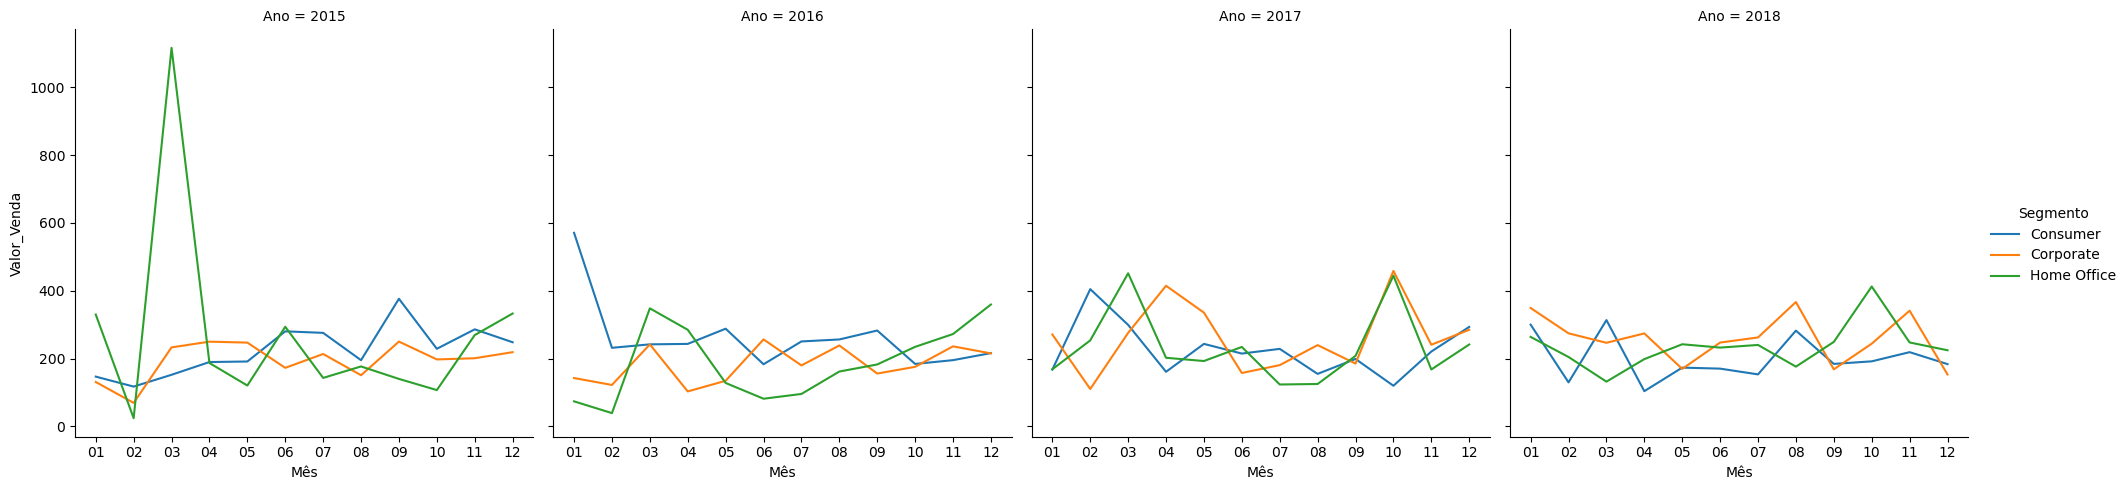

In [23]:
#Características do gráfico

#Importação de biblioteca
import seaborn as sns

plt.figure(figsize = (12, 6))
fig1 = sns.relplot(kind = 'line',
                   data = df9, 
                   y = 'Valor_Venda', 
                   x = meses,
                   hue = segmentos, 
                   col = anos,
                   col_wrap = 4)

#Plotagem 
plt.show()

### Pergunta de Negócio 10:
Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?
Demonstre tudo através de um único gráfico.

In [24]:
#Top 12 SubCategorias

#Construção de DataFrame com Categoria e Subcategorias
df10 = vendas.groupby(['Categoria',\
                       #Somando todos os valores numéricos
                       'SubCategoria']).sum(numeric_only = True).sort_values('Valor_Venda',\
                                                                             #Organizando em ordem decrescente
                                                                             ascending = False)[:12]
df10

Valor_Venda
Categoria       SubCategoria             
Technology      Phones        325271.2940
Furniture       Chairs        317919.6250
Office Supplies Storage       216188.3620
Furniture       Tables        202083.3600
Office Supplies Binders       194723.3810
Technology      Machines      189238.6310
                Accessories   162791.3620
                Copiers       146248.0940
Furniture       Bookcases     108045.0467
Office Supplies Appliances    104061.6930
Furniture       Furnishings    88862.7700
Office Supplies Paper          76312.7640

In [25]:
#Alterando o DataFrame, classificando segundo a Categoria
df10 = df10[['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()
df10

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [26]:
#Agrupando os dados por 'Categoria' e 'SubCategoria', pivotando e calculando o total de vendas
df10 = df10.groupby(['Categoria', 'SubCategoria'])['Valor_Venda'].sum().unstack()

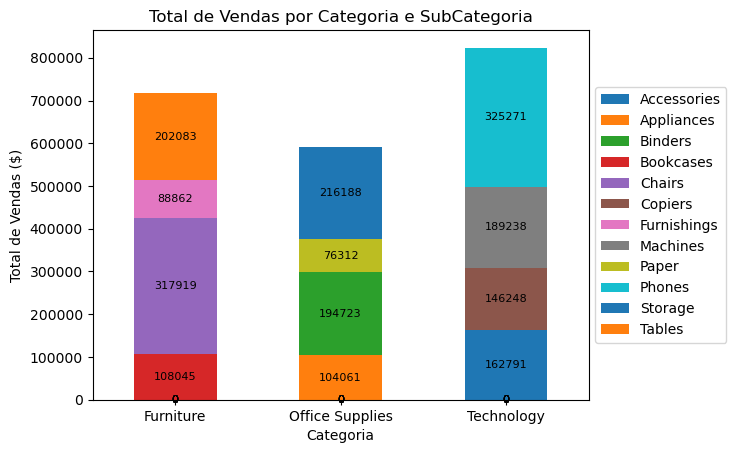

In [27]:
#Caracaterísticas do gráfico
ax = df10.plot(kind='bar',title='Total de Vendas por Categoria e SubCategoria', stacked=True)

#Adicionando os valores totais de cada subcategoria nas partes da coluna empilhada
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8)


plt.xticks(rotation=0)
plt.xlabel('Categoria')
plt.ylabel('Total de Vendas ($)')

#Posição da legenda da SubCategoria
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#Plotagem
plt.show()